In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
# json 파일 처리
import json

In [5]:
# 파일 존재 여부 확인용
import os

In [6]:
# 모델
from tensorflow import keras

# 변수 목록

In [7]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [12]:
# 자꾸 폴더 이름 바꾸는거 까먹어서 아예 변수로 추가
male_female = "Female"
train_test = "Test"

In [13]:
ori_data_dir_name = "./Dataset/Musinsa_Dataset/Train-Test/" + male_female + "/" + train_test + "/"

new_data_dir_name = "./Dataset/Musinsa_Dataset/Train-Test_0515/" + male_female + "/" + train_test + "/"

img_width = 200
img_height = 200
read_size = 5000

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

In [14]:
print("From: " + ori_data_dir_name)
print("To: " + new_data_dir_name)

print(len(os.listdir(ori_data_dir_name + "Image")))
print(len(os.listdir(ori_data_dir_name + "Json")))

dir_file_size = len(os.listdir(ori_data_dir_name + "Json"))

From: ./Dataset/Musinsa_Dataset/Train-Test/Female/Test/
To: ./Dataset/Musinsa_Dataset/Train-Test_0515/Female/Test/
4900
4900


# 배경 제거 모델

In [15]:
seg_model_path = model_dir_name + "poly_seg_model_0428_02.keras"

# 분할실행용 변수

In [16]:
read_point = 1
# read_point = save_point

In [17]:
print(read_point)

1


In [18]:
save_point = read_point

In [19]:
print(save_point)

1


# 데이터 불러오기

In [20]:
ori_img_list = []
json_list = []

while len(json_list) < read_size:
  # 디렉토리 내 최대 파일까지 읽은 경우
  if read_point > dir_file_size:
    break

  img_path = ori_data_dir_name + "Image/" + str(read_point) + ".jpg"
  label_path = ori_data_dir_name + "Json/" + str(read_point) + ".json"

  # 이미지 파일 로드
  img_file = cv2.imread(img_path)
  if img_file is None:
    print(str(read_point) + ".jpg File Load Failed!!")
    break

  # json 파일 로드
  with open(label_path, "r") as loadfile:
    label_file = json.load(loadfile)
  if label_file is None:
    print(str(read_point) + ".json File Load Failed!!")
    break


  ori_img_list.append(img_file)
  json_list.append(label_file)


  if len(json_list)%500 == 0: # 진행도 확인용
    print(str(len(json_list)) + "개 파일 읽기 완료")

  read_point = read_point+1


print()
print("Complete")
print("다음 read point: " + str(read_point))

500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료

Complete
다음 read point: 4901


# 학습을 위해 X 데이터 형식 변경

In [21]:
ori_img_list = np.array(ori_img_list)
ori_img_list.shape

(4900, 200, 200, 3)

# 이미지 배경 제거

In [22]:
# 데이터 크기 확인

seg_model = keras.models.load_model(seg_model_path)
print(ori_img_list.shape)

print("Complete")

(4900, 200, 200, 3)
Complete


In [23]:
# 예측 진행
seg_preds = seg_model.predict(ori_img_list)
print("Complete")

154/154 [==============================] - 56s 274ms/step
Complete


In [24]:
# 예측 결과를 마스크로 생성하고 저장

img_mask = []

for i in range(0, len(seg_preds)):
    total_mask = seg_preds[i].argmax(axis=-1)
    bg_mask = np.ones(total_mask.shape, dtype=np.uint8)
    bg_mask[total_mask == 0] = 0
    img_mask.append(bg_mask)

print("Complete")

Complete


In [25]:
# 배경 제거 마스크 적용하고 저장
new_img_list = []

for i in range(0, len(img_mask)):
  no_bg_img = cv2.bitwise_and(ori_img_list[i], ori_img_list[i], mask=img_mask[i])
  new_img_list.append(no_bg_img)

# np.array 형태로 변환
new_img_list = np.array(new_img_list)
print("Complete")
print(new_img_list.shape)

Complete
(4900, 200, 200, 3)


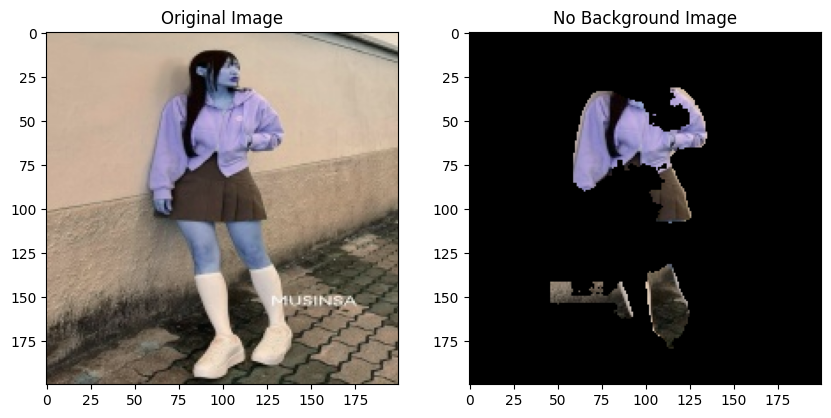

In [26]:
# 배경 제거 확인
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ori_img_list[0])
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(new_img_list[0])
plt.title("No Background Image")

plt.show()

# 가공된 데이터를 폴더에 저장

In [27]:
i = save_point

for img in new_img_list:
  success = cv2.imwrite(new_data_dir_name + "Image/" + str(i) + ".jpg", img)

  if not success:
    print("Image Save Failed!!")
    break

  i = i+1

print("Complete")

Complete


In [28]:
i = save_point

for json_file in json_list:
  json_path = new_data_dir_name + "Json/" + str(i) + ".json"

  with open(json_path, 'w') as outfile:
    json.dump(json_file, outfile)

  if not os.path.isfile(json_path): # 파일 저장에 실패했을 경우
    print("Json Save Failed!!")
    break

  i = i+1

  save_point = i

print("Complete")
print("다음 save point : " + str(save_point))

Complete
다음 save point : 4901
